### Gold Price Prediction using time-series-forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [5]:
df.shape

(847, 2)

In [6]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


In [7]:
print(f"Date Range : {df['Date'][0]} - {df['Date'][len(df)-1]}")

Date Range : 1950-01 - 2020-07


In [8]:
date = pd.date_range(start='1/1/1950',end='8/1/2020',freq='M')

The pd.date_range function in the pandas library generates a range of dates. The arguments specify the start and end dates, and the frequency of the dates within that range.

In [9]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [10]:
len(date)

847

In [11]:
df['month'] = date
df.drop('Date',axis=1,inplace=True)
df = df.set_index('month')

In [12]:
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


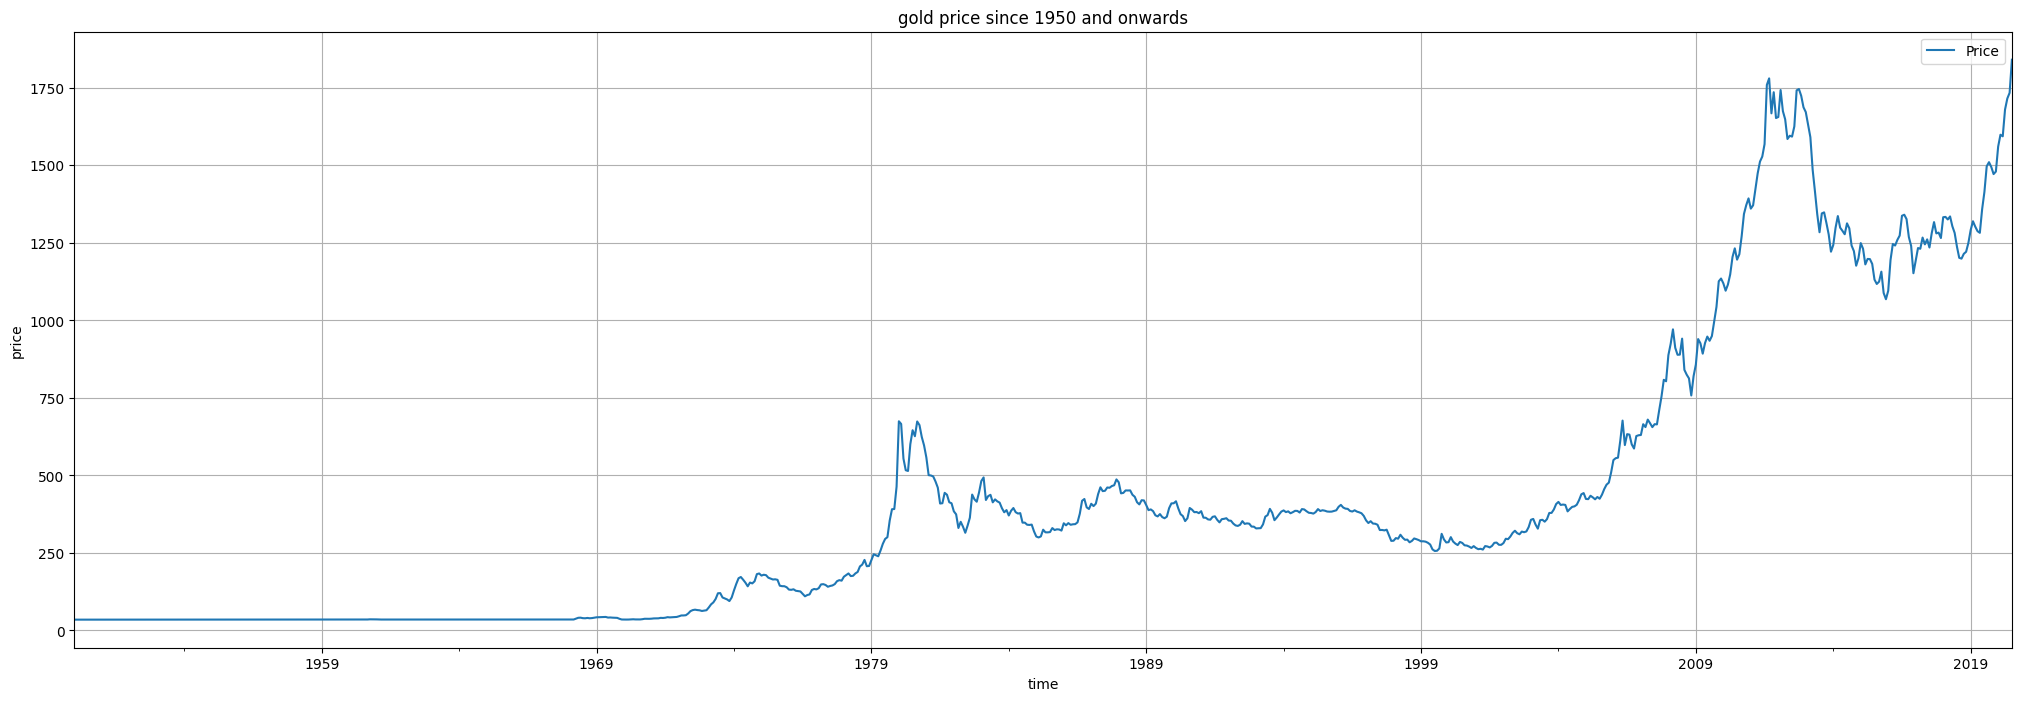

In [13]:
df.plot(figsize=(25,8))
plt.title("gold price since 1950 and onwards")
plt.xlabel("time")
plt.ylabel("price")
plt.grid()

In [14]:
df.index.year

Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       ...
       2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
      dtype='int32', name='month', length=847)

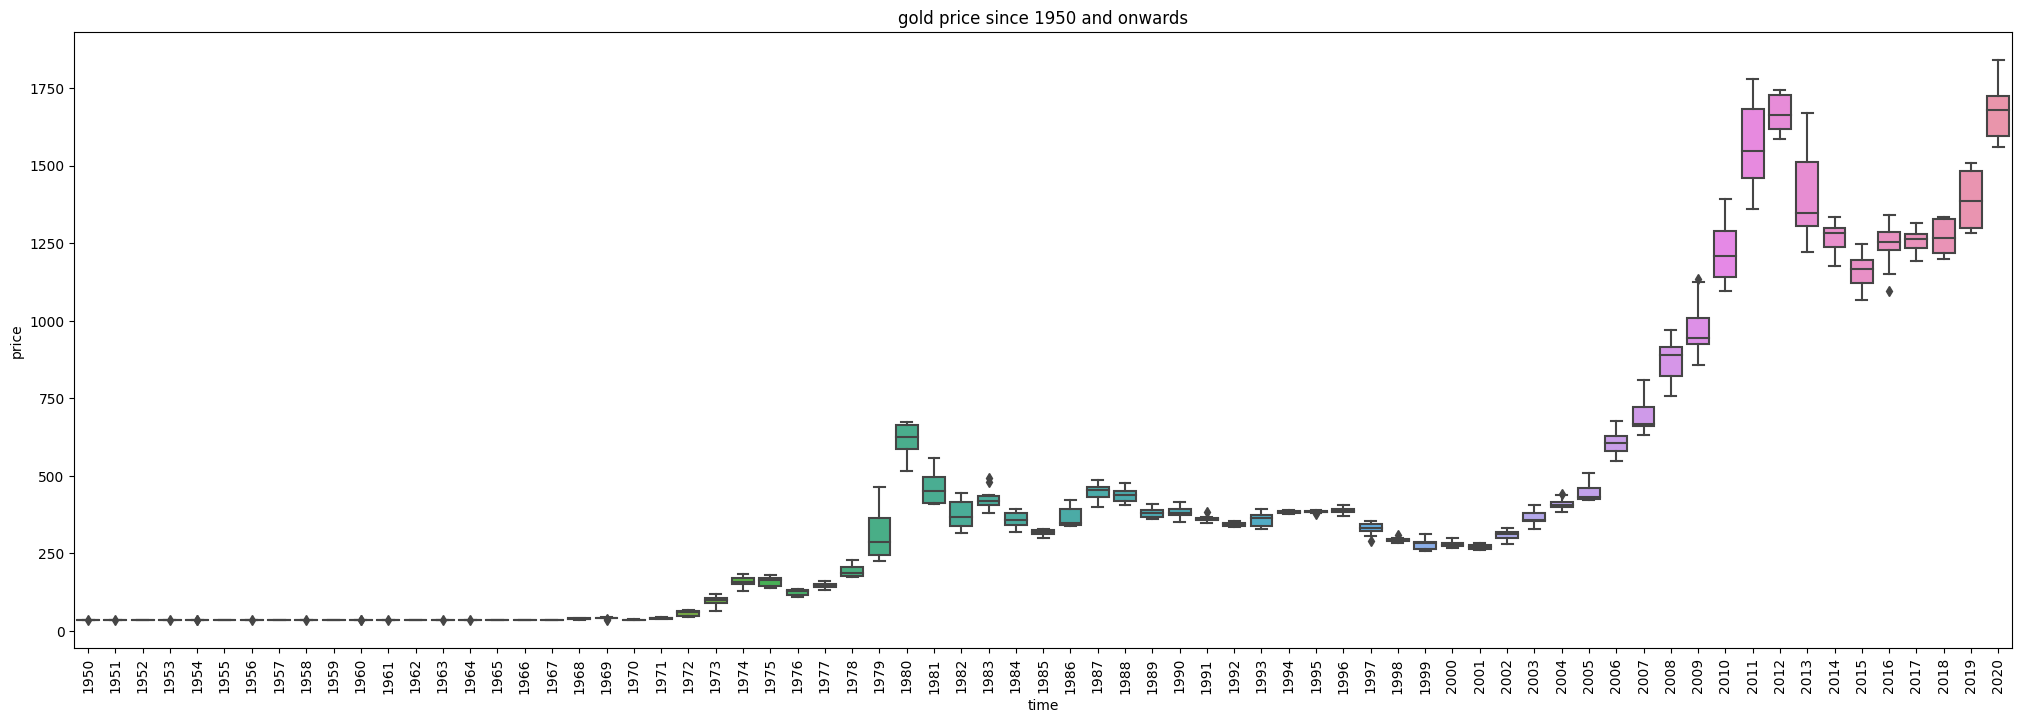

In [15]:
_,ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year,y = df['Price'].values,ax=ax)
plt.title("gold price since 1950 and onwards")
plt.xlabel("time")
plt.xticks(rotation=90)
plt.ylabel("price")
plt.show()

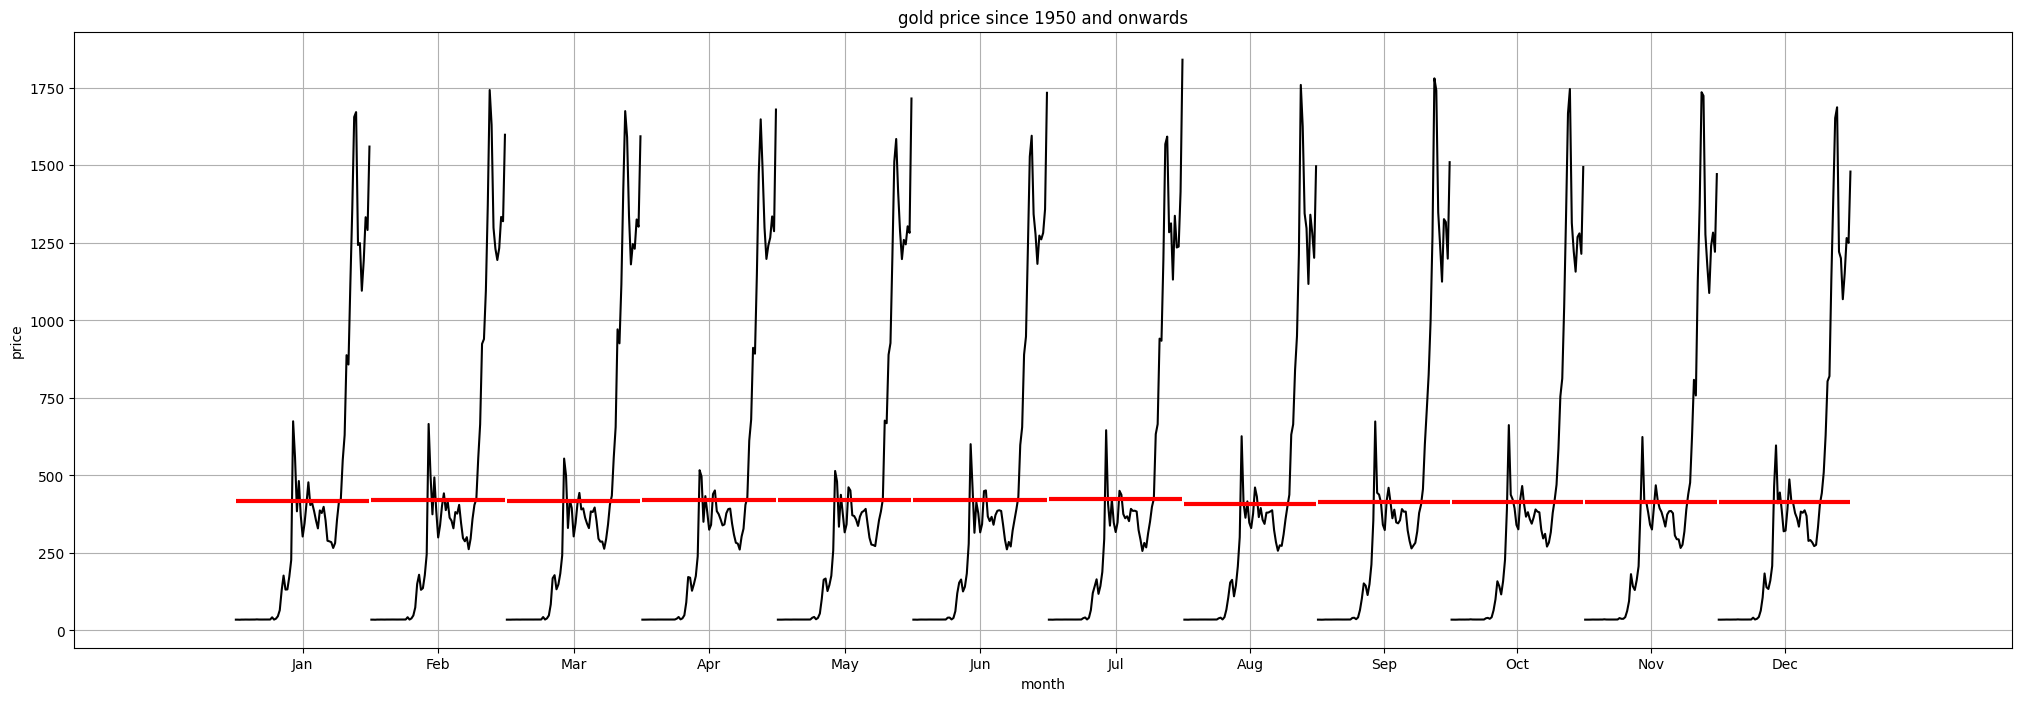

In [16]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax = plt.subplots(figsize=(25,8))
month_plot(df,ylabel="gold price",ax=ax)
plt.title("gold price since 1950 and onwards")
plt.xlabel("month")
plt.ylabel("price")
plt.grid()

In [17]:
df.index.month_name()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October',
       ...
       'October', 'November', 'December', 'January', 'February', 'March',
       'April', 'May', 'June', 'July'],
      dtype='object', name='month', length=847)

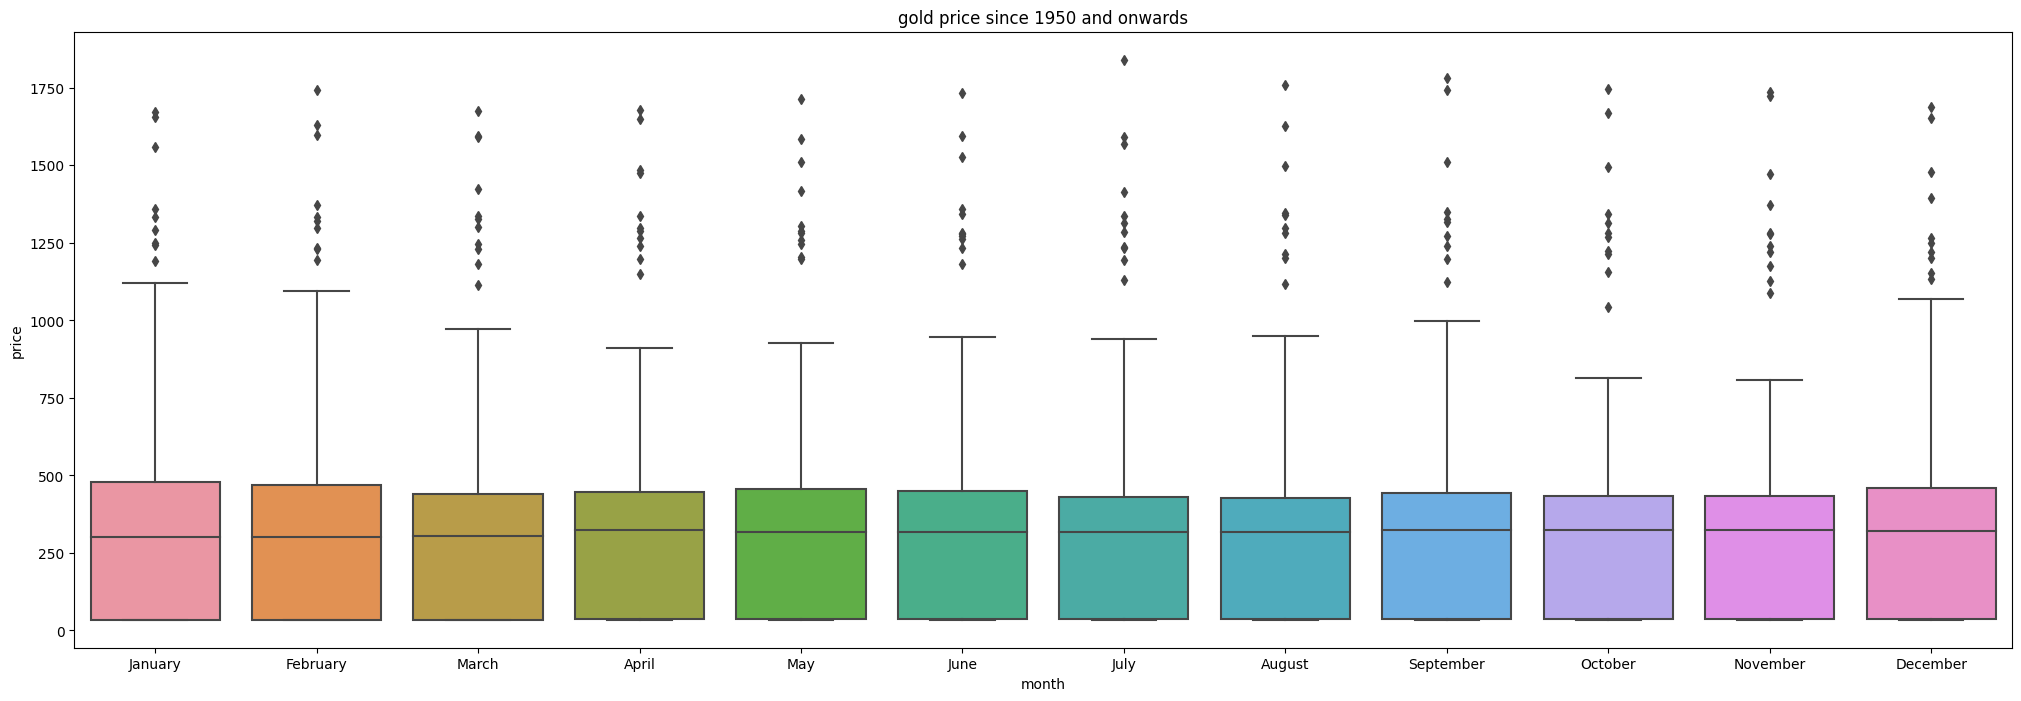

In [18]:
_,ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.month_name(),y=df['Price'].values,ax=ax)
plt.title("gold price since 1950 and onwards")
plt.xlabel("month")
plt.ylabel("price")
plt.show()

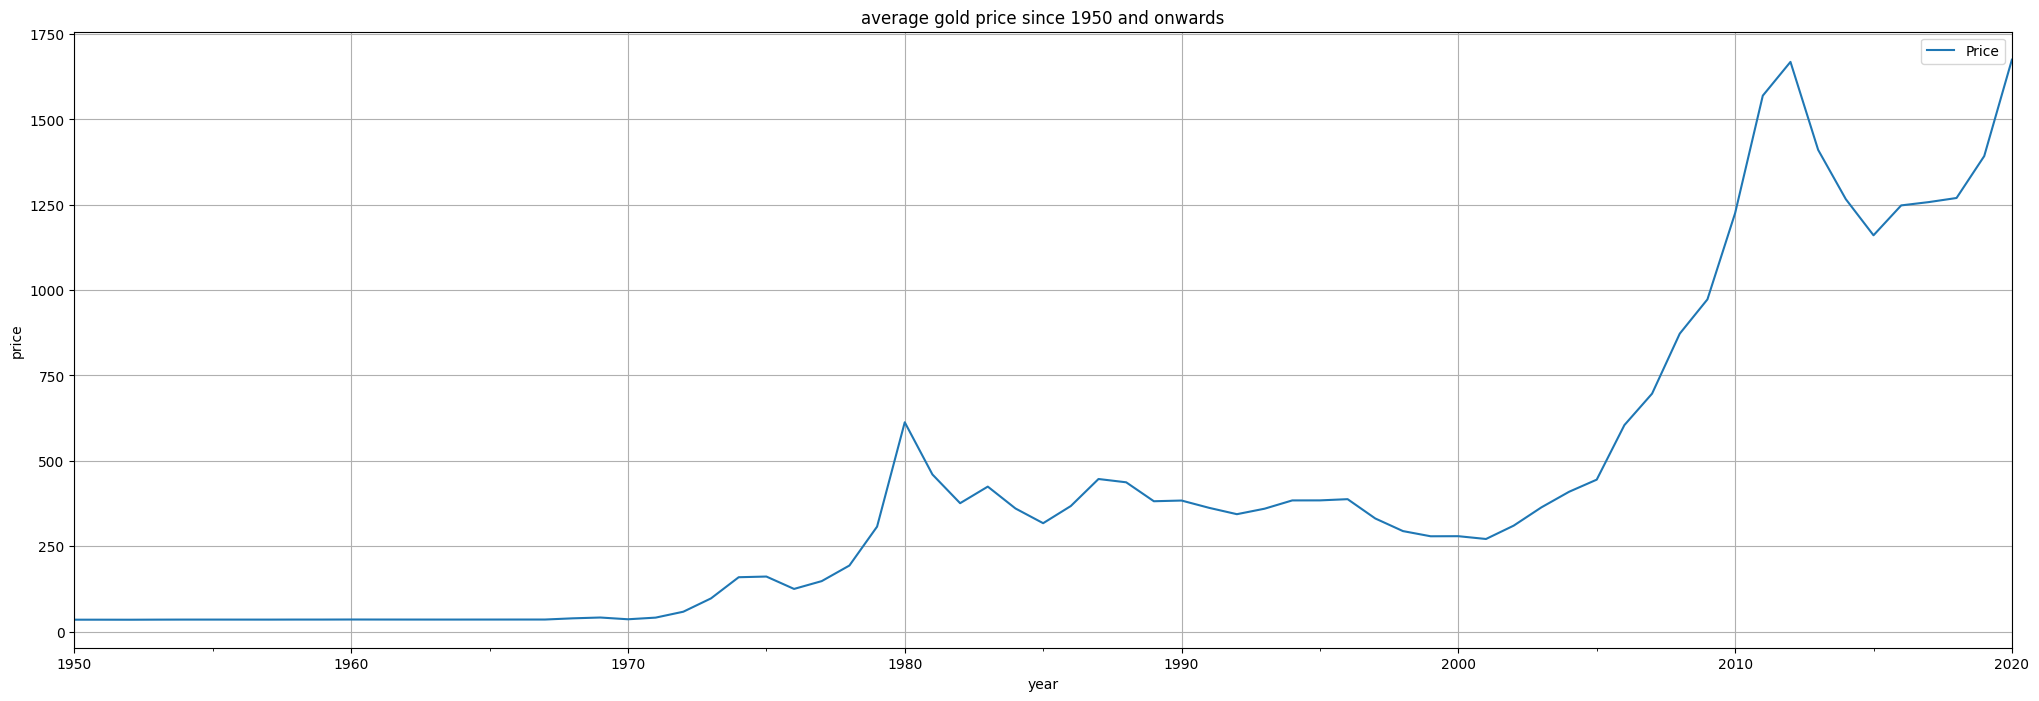

In [19]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot(figsize=(25,8))
plt.title("average gold price since 1950 and onwards")
plt.xlabel("year")
plt.ylabel("price")
plt.grid()

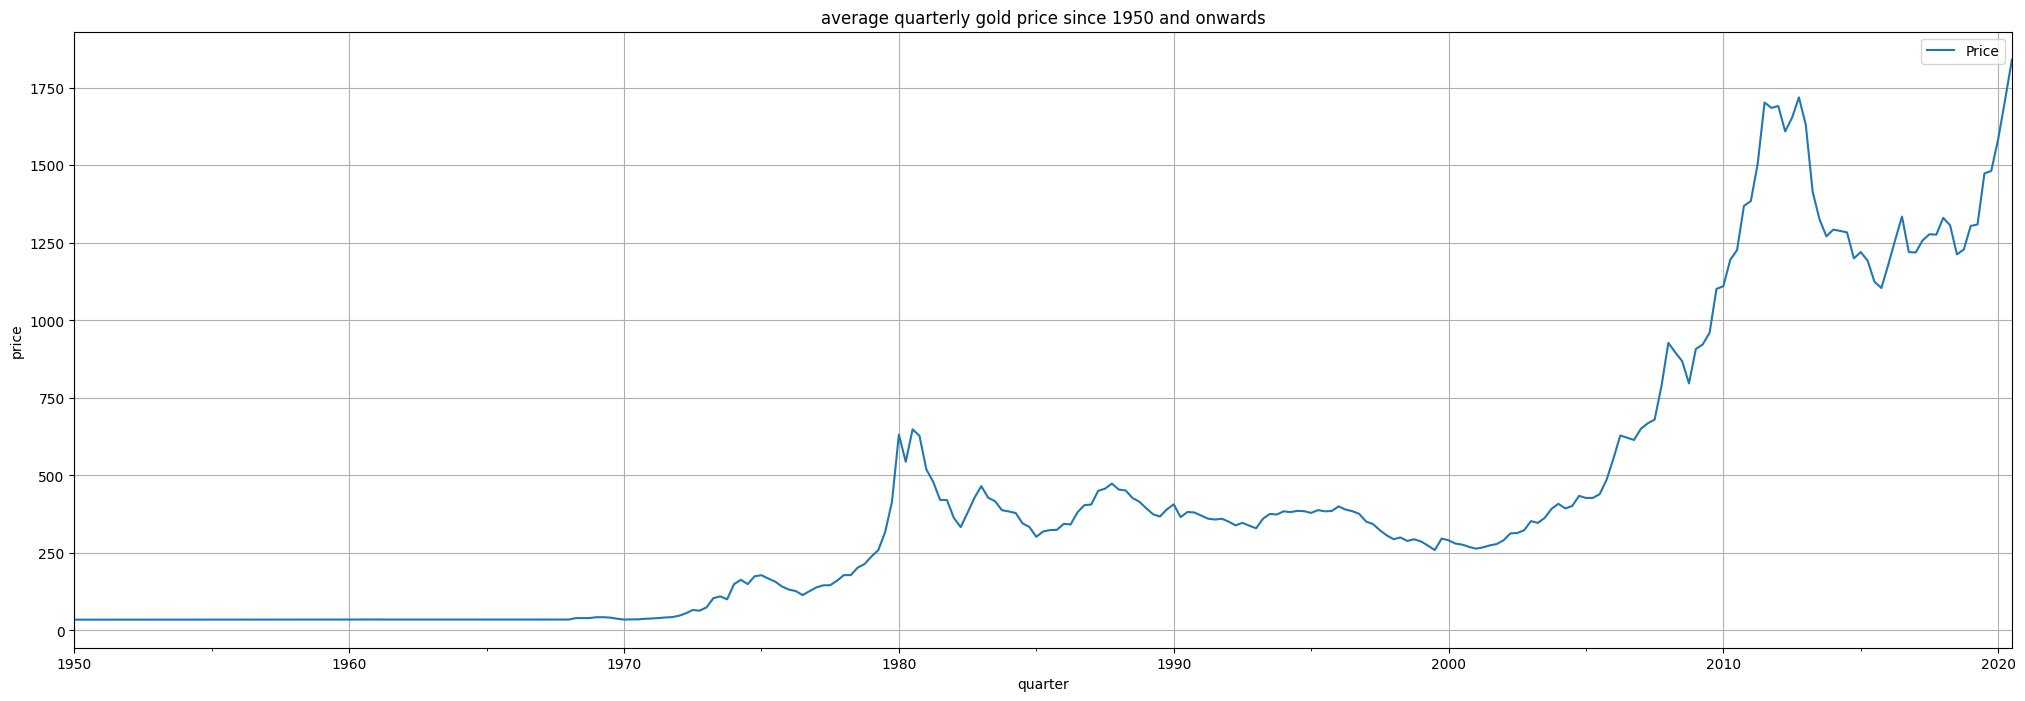

In [20]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot(figsize=(25,8))
plt.title("average quarterly gold price since 1950 and onwards")
plt.xlabel("quarter")
plt.ylabel("price")
plt.grid()

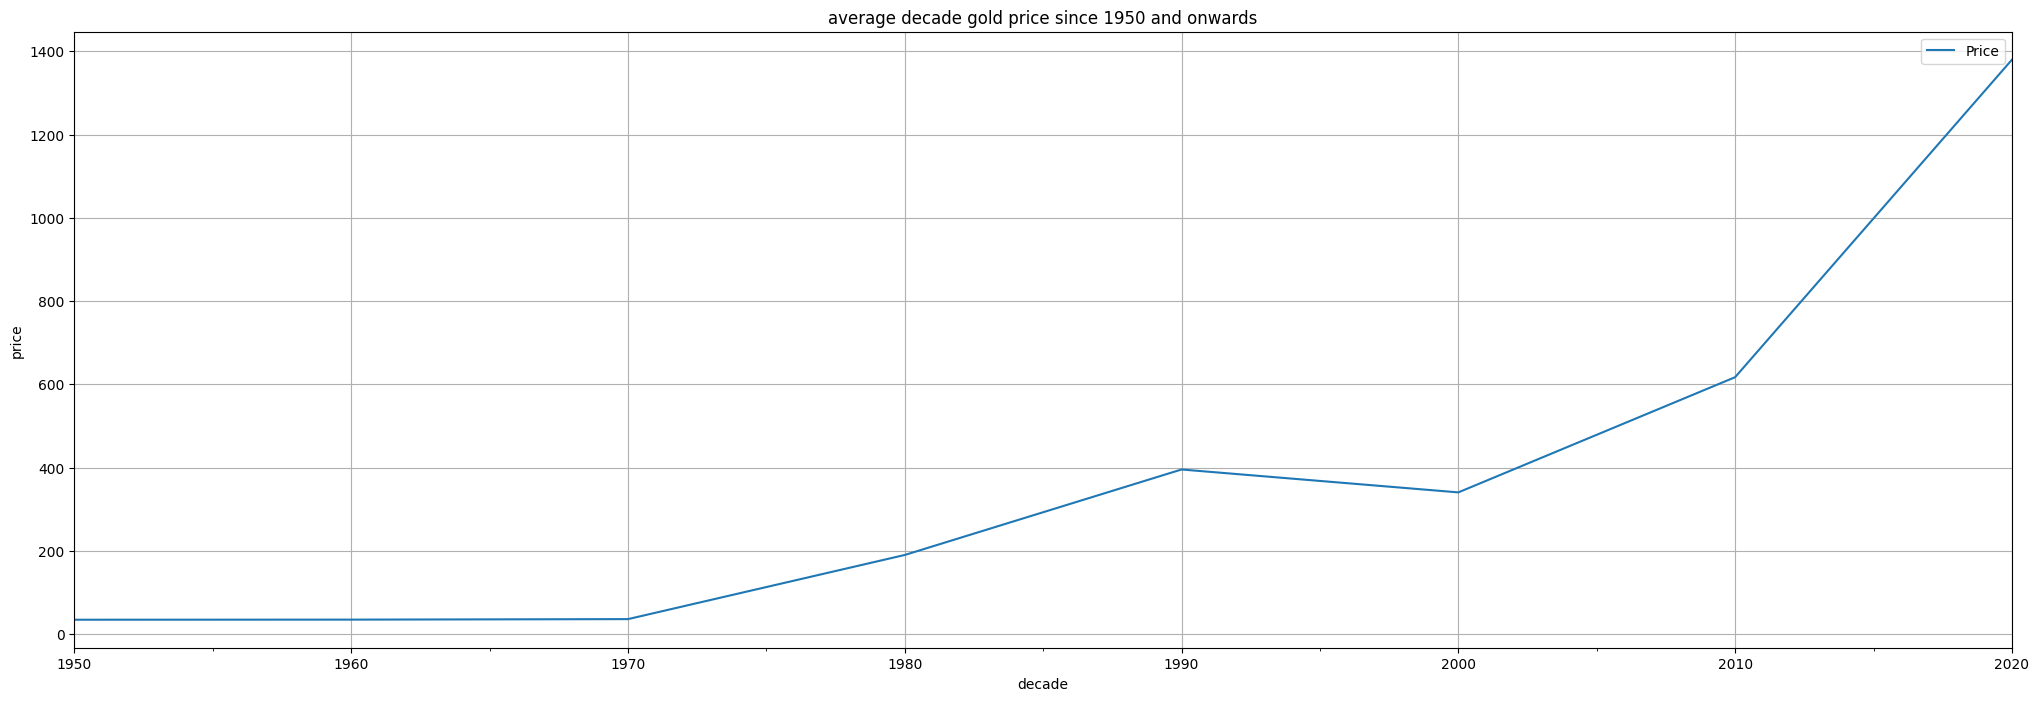

In [21]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot(figsize=(25,8))
plt.title("average decade gold price since 1950 and onwards")
plt.xlabel("decade")
plt.ylabel("price")
plt.grid()

``The highest coefficient of variation means data is more variable``

``The coefficient of variation (CV) in finance measures the relative risk or volatility of an investment compared to its expected return``

In [22]:
df1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df1 = df1.merge(df.groupby(df.index.year).std().rename(columns={'Price':"Std"}),left_index=True,right_index=True)

In [23]:
df1.head()

,Mean,Std
month,,
1950,34.729167,0.002887
1951,34.717500,0.020057
1952,34.628333,0.117538
1953,34.879167,0.056481
1954,35.020000,0.082792


In [24]:
df1['coef_var'] = ((df1['Std']/df1['Mean'])*100).round(2)

In [25]:
df1.head()

,Mean,Std,coef_var
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


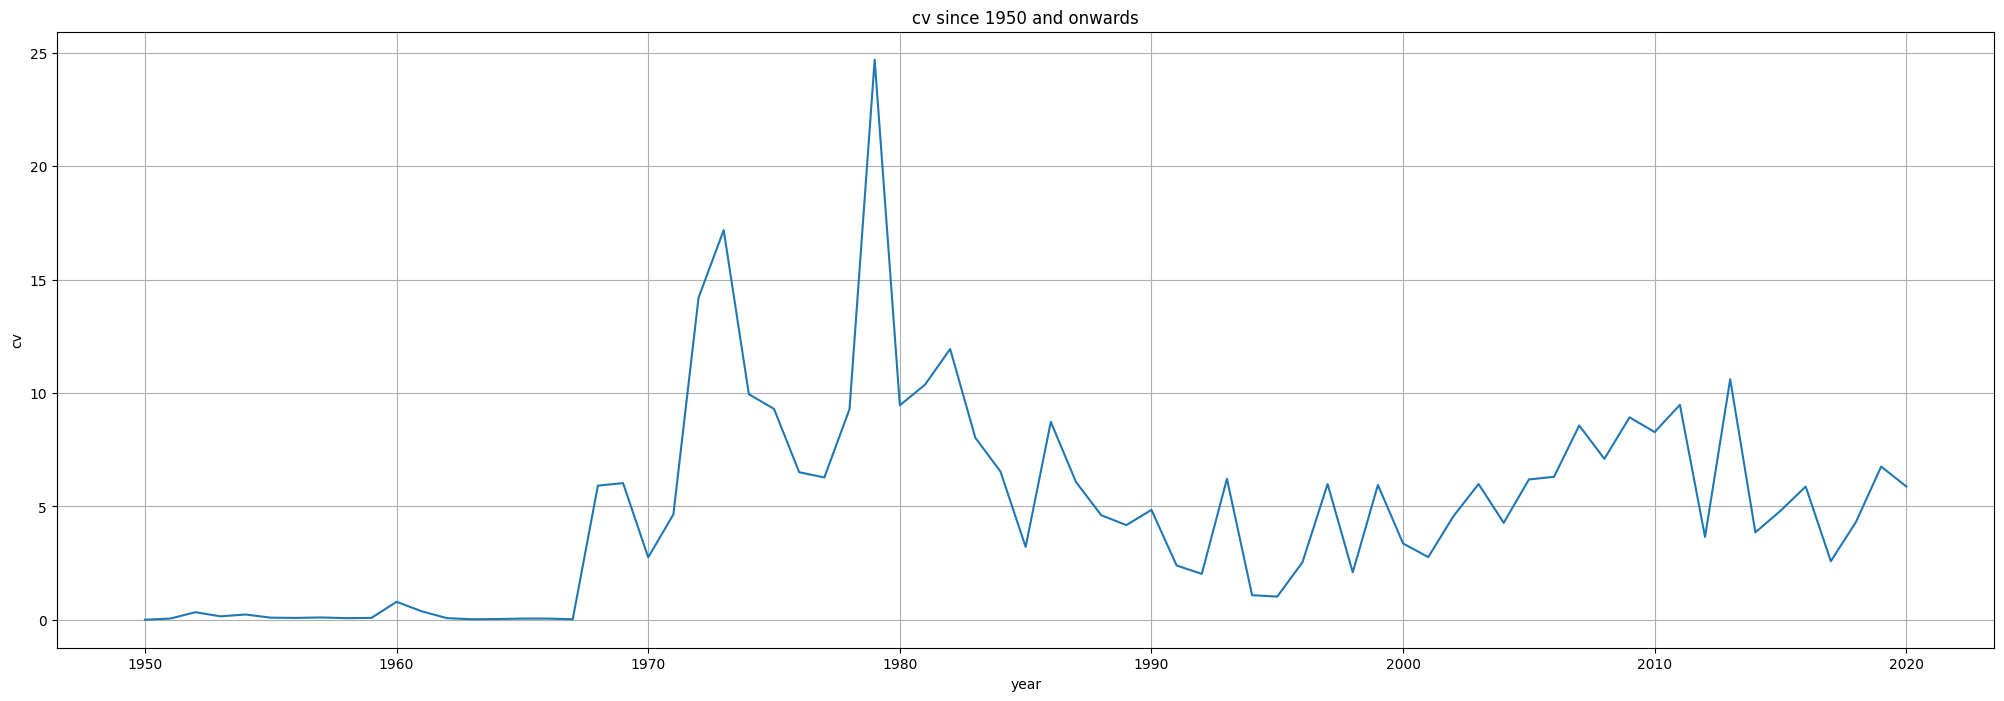

In [26]:
fix,ax = plt.subplots(figsize=(25,8))
df1['coef_var'].plot()
plt.title("cv since 1950 and onwards")
plt.xlabel("year")
plt.ylabel("cv")
plt.grid()

In [27]:
train = df[df.index.year<2014]
test = df[df.index.year>=2014]

In [28]:
print(train.shape)
print(test.shape)

(768, 1)
(79, 1)


Text(0, 0.5, 'price')

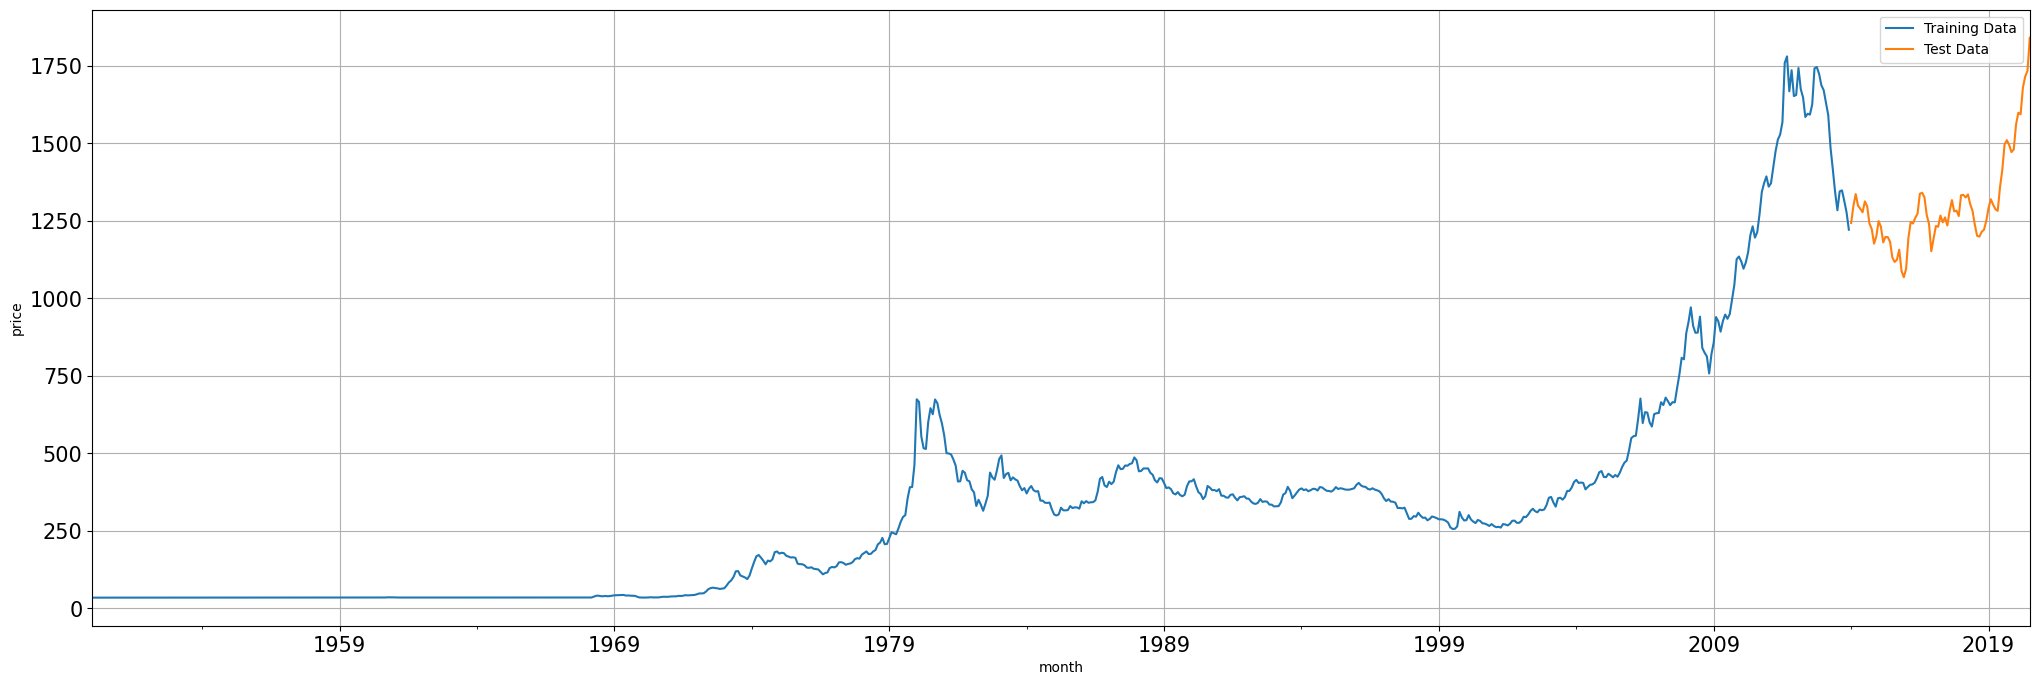

In [29]:
train["Price"].plot(figsize=(25,8),fontsize=15)
test["Price"].plot(figsize=(25,8),fontsize=15)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.ylabel("price")

In [30]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(768, 79)

In [31]:
train_data = train.copy()
test_data = test.copy()

In [32]:
train_data['time'] = train_time
test_data['time'] = test_time

### Linear Regression

In [37]:
lr = LinearRegression()
lr.fit(train_data.time.values.reshape(-1,1),train_data.Price.values)

LinearRegression()

In [42]:
predictions = lr.predict(test_data.time.values.reshape(-1,1))
test_data["predictions"] = predictions

Text(0, 0.5, 'price')

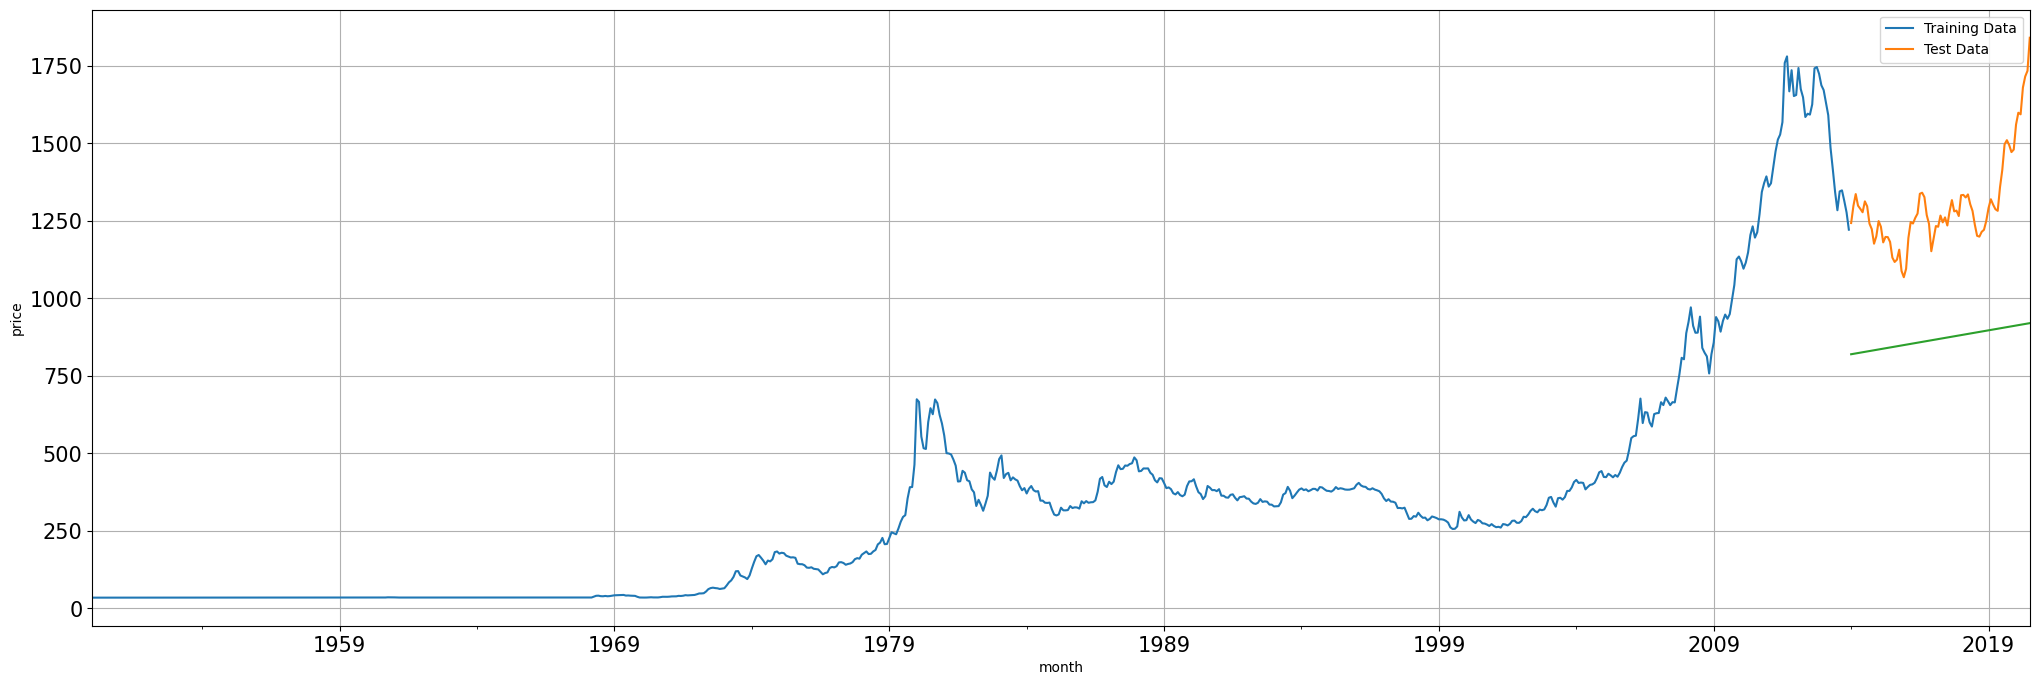

In [43]:
train_data["Price"].plot(figsize=(25,8),fontsize=15)
test_data["Price"].plot(figsize=(25,8),fontsize=15)
test_data["predictions"].plot(figsize=(25,8),fontsize=15)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.ylabel("price")

In [44]:
def mape(actual,prediction):
    return round((np.mean(abs(actual-prediction)/actual))*100,2)

In [45]:
mape(test_data.Price,test_data.predictions)

32.58

``mape is a measure of prediction accuracy of forecasting model``

### Exponential Smoothing 

In [47]:
final_model = ExponentialSmoothing(df,
                                   trend='additive',
                                   seasonal='additive').fit(smoothing_level=0.4,
                                                            smoothing_trend=0.3,
                                                            smoothing_seasonal=0.6)

In [48]:
mape(df['Price'].values,final_model.fittedvalues)

17.24

In [49]:
predictions = final_model.forecast(steps=len(test))

In [51]:
predictions

2020-08-31    1792.869246
2020-09-30    1723.452788
2020-10-31    1646.711851
2020-11-30    1584.899804
2020-12-31    1567.466182
                 ...     
2026-10-31    2248.539190
2026-11-30    2186.727142
2026-12-31    2169.293520
2027-01-31    2224.382203
2027-02-28    2255.316178
Freq: M, Length: 79, dtype: float64

In [53]:
pred_df = pd.DataFrame({"lower_CI":predictions-1.96*np.std(final_model.resid,ddof=1),
                        "prediction":predictions,
                        "upper_CI":predictions+1.96*np.std(final_model.resid,ddof=1)})

In [54]:
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


In [55]:
pred_df.shape

(79, 3)

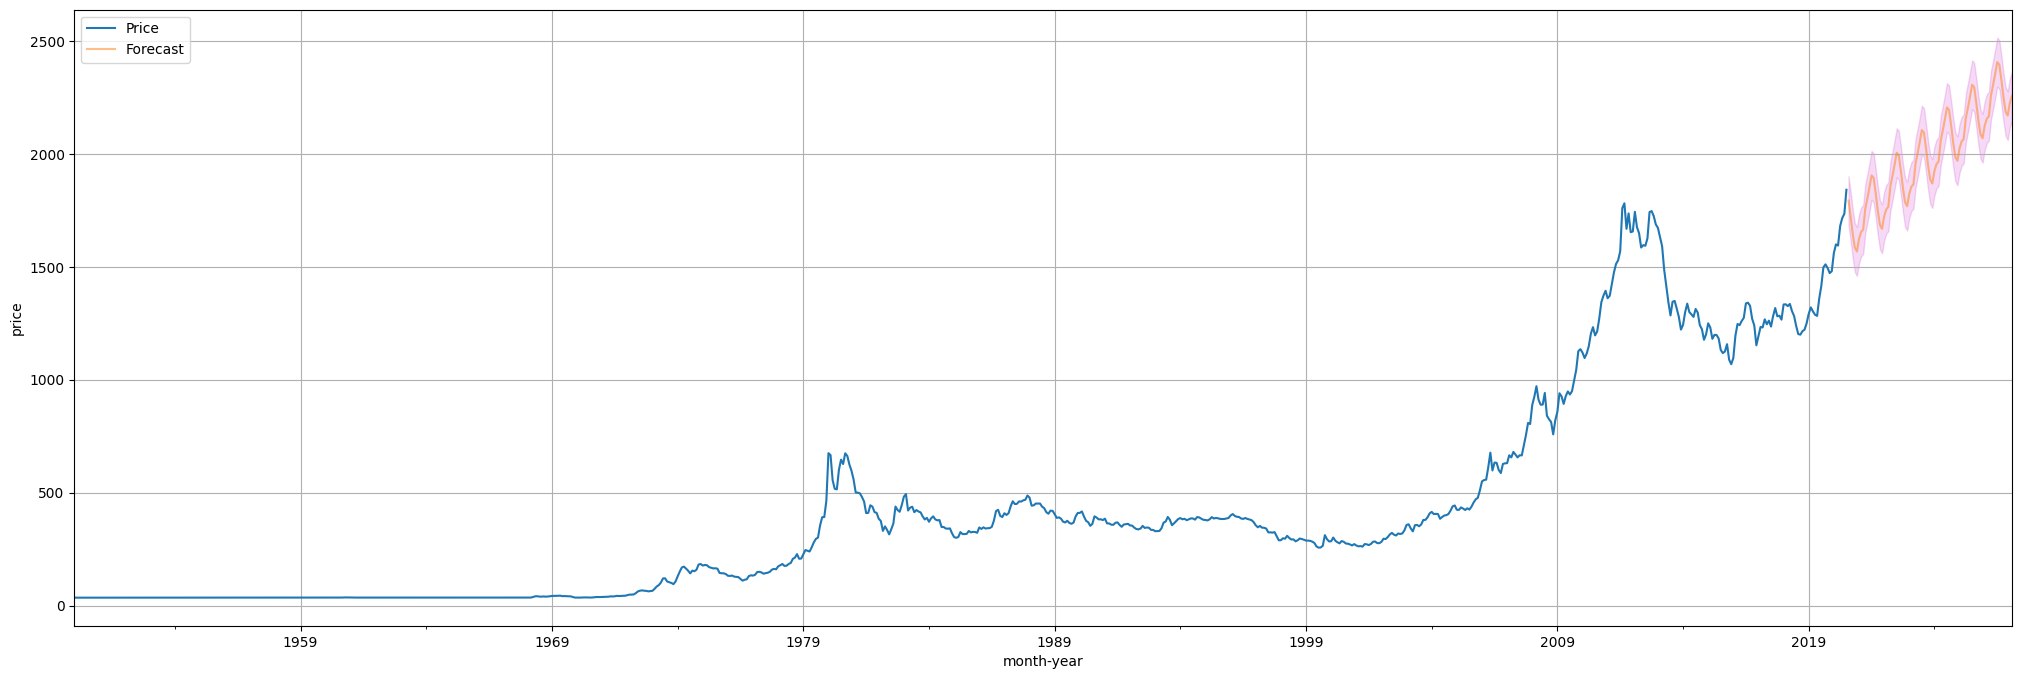

In [67]:
axis = df.plot(label="Actual",figsize=(25,8))
pred_df.prediction.plot(ax=axis,label="Forecast",alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_CI'],color='m',alpha=0.15)
axis.set_xlabel('month-year')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()